# Class Central Survey: compare target group 'Willingness to pay' with the rest of the sample

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

## Read the survey data

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

## Create target group 'Willingness to pay'

In [3]:
df['How willing are you to pay for a certificate for a MOOC?'].value_counts()

1                              673
3                              669
2                              598
4                              273
5                              204
Generally not that willing.      1
Name: How willing are you to pay for a certificate for a MOOC?, dtype: int64

In [4]:
target_name = 'Willingness to pay'
willing = (pd.to_numeric(df['How willing are you to pay for a certificate for a MOOC?'], errors='coerce') > 3)

## Generic function to plot barchart for any categorical feature on any target/nontarget split 

In [5]:
def binary_compare_categorical_barh(mask, feature, df=df,
                                            target_name='target', nontarget_name='Other', 
                                            split_name='visitor', answer='answer'):
    """Split dataframe into two based on mask
    Draw horizontal barcharts for each category item for both masked and unmasked object"""
    target = df[mask]
    nontarget = df[~mask]
    target_size, nontarget_size = len(target), len(nontarget)
    
    res_target = target[feature].value_counts()/target_size*100
    res_nontarget = nontarget[feature].value_counts()/nontarget_size*100
    
    result = pd.DataFrame({target_name: res_target, nontarget_name: res_nontarget})
    result[answer] = result.index
    
    res_df = pd.melt(result, id_vars=answer, var_name=split_name, value_name='percentage')
    print(res_df)
    
    sns.factorplot(x='percentage', y=answer, hue=split_name, data=res_df, kind='bar', orient='h', size=6, aspect=2)
    plt.title(feature)
    sns.despine(left=True, bottom=True)
    plt.show()
    return

## Generic function to plot barchart for any multi-categorical feature on any target/nontarget split

In [6]:
def binary_compare_multi_select_categorical_barh(df, target, target_name, question, selectors, nontarget_name = 'Others'):
    """draw a barchart for Survey results on a question that allows to select multiple categories
    df: dataframe to use
    target: selection of rows based on column values
    question: the question you want to analyse
    selectors: list of df column containing the selectors (values 0/1)"""
    size = {}
    target_df = df[target]
    nontarget_df = df[~target]
    size[target_name], size[nontarget_name] = len(target_df), len(nontarget_df)
    print(size)
    graph_targetdata = target_df.loc[:, selectors]
    graph_targetdata['target'] = target_name
    
    graph_nontargetdata = nontarget_df.loc[:, selectors]
    graph_nontargetdata['target'] = nontarget_name
    
    graph_data = pd.concat([graph_targetdata, graph_nontargetdata])
    
    melted = pd.melt(graph_data, id_vars='target', var_name='select', value_name='percentage')
    grouped = melted.groupby(['target', 'select'], as_index=False).sum()
    #print(size[grouped['target']])
    grouped.percentage = grouped.percentage/grouped['target'].map(size)*100 # make it percentage of total
    grouped['select'] = grouped['select'].apply(lambda x: x.split(": ")[1]) # remove prefix from string
    print(grouped)  
    
    sns.factorplot(x='percentage', y='select', hue='target', data=grouped, kind='bar', orient='h', size=6, aspect=2)
    sns.plt.title(question)
    sns.despine(left=True, bottom=True)
    sns.plt.show()

## Apply this plot on the target 'Willing to pay' for some categorical features

   answer         visitor  percentage
0     5.0           Other   29.890765
1     4.0           Other   22.641509
2     1.0           Other   21.996028
3     3.0           Other   14.846077
4     2.0           Other    9.682224
5     5.0  Willing to pay   38.784067
6     4.0  Willing to pay   21.593291
7     1.0  Willing to pay   16.981132
8     3.0  Willing to pay   12.788260
9     2.0  Willing to pay    9.014675


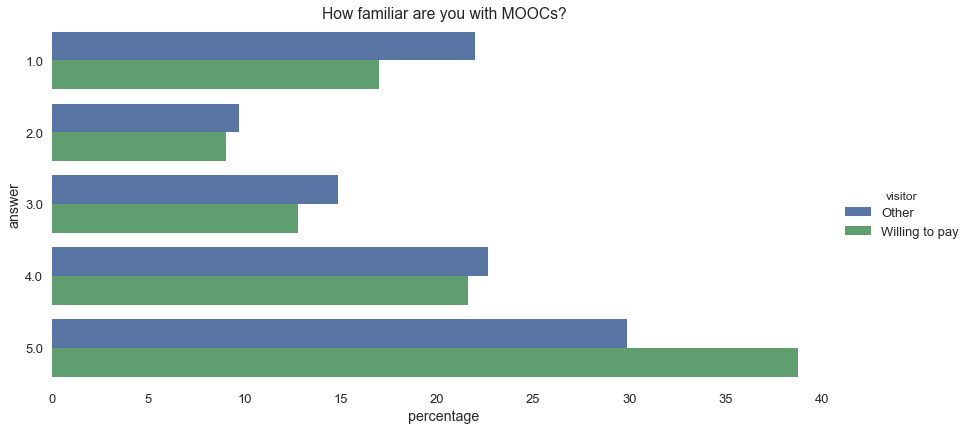

In [7]:
binary_compare_categorical_barh(mask=willing, 
            target_name='Willing to pay', feature='How familiar are you with MOOCs?')

                        answer         visitor  percentage
0                       Africa           Other    9.235353
1      Australia / New Zealand           Other    3.574975
2                       Canada           Other    4.518371
3     Central or South America           Other    5.759682
4        East & Southeast Asia           Other    7.845084
5               Eastern Europe           Other    6.156902
6                        India           Other    8.887786
7                       Mexico           Other    1.936445
8               United Kingdom           Other    4.170804
9                United States           Other   33.366435
10  Western Europe (except UK)           Other   12.264151
11                      Africa  Willing to pay   18.867925
12     Australia / New Zealand  Willing to pay    4.192872
13                      Canada  Willing to pay    2.725367
14    Central or South America  Willing to pay    6.498952
15       East & Southeast Asia  Willing to pay    8.8050

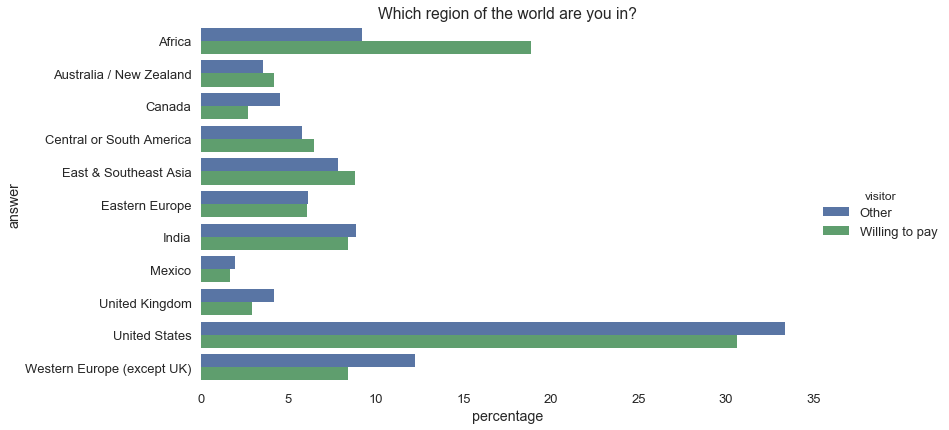

In [8]:
binary_compare_categorical_barh(mask=willing, 
            target_name='Willing to pay', feature='Which region of the world are you in?')

Africa is the only region where there are far more people willing to pay for a certificate than people who wont.
The higher education quality available at a lower cost in the region, the lesser people are willing to pay for a MOOC certificate.

   answer        visitor  percentage
0     1.0          Other   20.953327
1     2.0          Other   13.952334
2     3.0          Other   22.740814
3     4.0          Other   18.619662
4     5.0          Other   22.542205
5     1.0  Willng to pay    3.773585
6     2.0  Willng to pay    2.935010
7     3.0  Willng to pay   13.207547
8     4.0  Willng to pay   27.253669
9     5.0  Willng to pay   52.201258


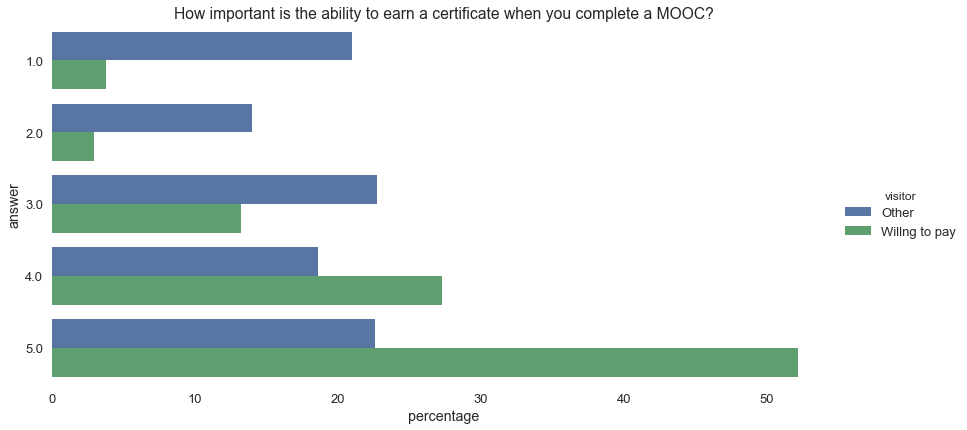

In [9]:
binary_compare_categorical_barh(mask=willing, 
                                        target_name='Willng to pay', feature='How important is the ability to earn a certificate when you complete a MOOC?')

Those who find the ability to earn a certificate important are more willing to pay than the others. This is one of the first actions the platform providers took to increase there business: quit with the free certificates.

{'Willing to pay': 477, 'Others': 2014}
           target                              select  percentage
0          Others       Access to reference materials   27.706058
1          Others  Learning skills for current career   49.553128
2          Others      Learning skills for new career   45.183714
3          Others                   Personal interest   80.834161
4          Others                       School credit    7.994042
5  Willing to pay       Access to reference materials   29.140461
6  Willing to pay  Learning skills for current career   57.442348
7  Willing to pay      Learning skills for new career   60.167715
8  Willing to pay                   Personal interest   72.536688
9  Willing to pay                       School credit   11.320755


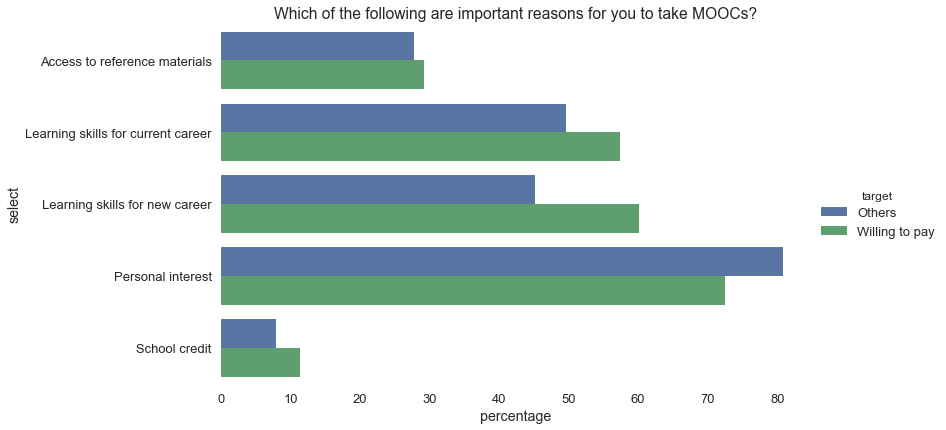

In [10]:
reasons = ['Reasons: Learning skills for current career', 'Reasons: Learning skills for new career', 
           'Reasons: School credit', 'Reasons: Personal interest', 'Reasons: Access to reference materials']
binary_compare_multi_select_categorical_barh(df, target=willing, target_name='Willing to pay',
                question='Which of the following are important reasons for you to take MOOCs?', 
                selectors=reasons)

There is only a slight difference in the reasons to follow MOOCs between those who are willing to pay and those who don't. When the reasons are career related respondents are willing to pay for a certificate.

{'Willing to pay': 477, 'Others': 2014}
            target                  select  percentage
0           Others  Institution/university   38.977160
1           Others              Instructor   16.137041
2           Others  Others recommendations   25.571003
3           Others                Platform   26.067527
4           Others                 Ratings   32.025819
5           Others           Topic/Subject   91.559086
6   Willing to pay  Institution/university   50.943396
7   Willing to pay              Instructor   15.723270
8   Willing to pay  Others recommendations   23.899371
9   Willing to pay                Platform   31.865828
10  Willing to pay                 Ratings   36.268344
11  Willing to pay           Topic/Subject   89.098532


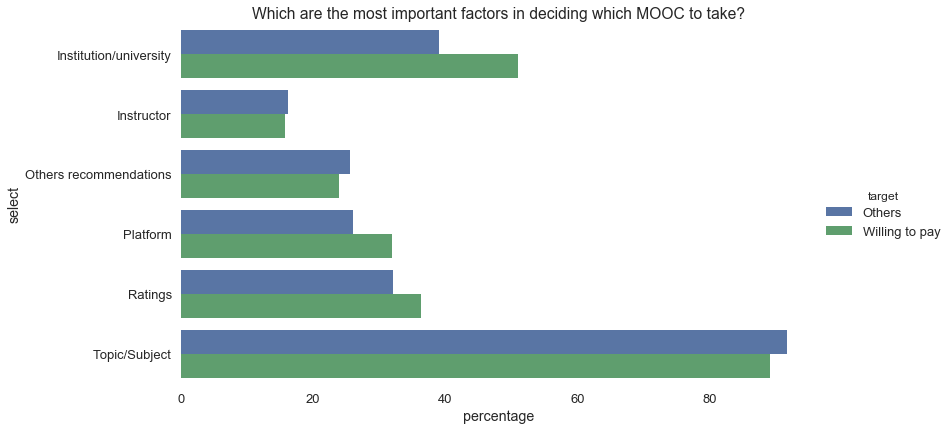

In [11]:
decisions = ['Decide: Topic/Subject', 'Decide: Instructor', 'Decide: Institution/university', 
             'Decide: Platform', 'Decide: Ratings', 'Decide: Others recommendations']
binary_compare_multi_select_categorical_barh(df, target=willing, target_name='Willing to pay',
                question='Which are the most important factors in deciding which MOOC to take?', 
                selectors=decisions)

The Institution is a more appealing reason to follow a MOOC for those who are willing to pay compared to those that are not.

{'Willing to pay': 477, 'Others': 2014}
           target                                             select  \
0          Others         Actively contributing to discussion forums   
1          Others                         Browsing discussion forums   
2          Others  Connecting with learners outside the course en...   
3          Others  Connecting with other learners in the course e...   
4          Others  Taking the course with other people you know (...   
5  Willing to pay         Actively contributing to discussion forums   
6  Willing to pay                         Browsing discussion forums   
7  Willing to pay  Connecting with learners outside the course en...   
8  Willing to pay  Connecting with other learners in the course e...   
9  Willing to pay  Taking the course with other people you know (...   

   percentage  
0   27.805362  
1   53.574975  
2   13.853029  
3   36.494538  
4   14.051639  
5   41.509434  
6   55.136268  
7   21.593291  
8   45.911950  
9   19.

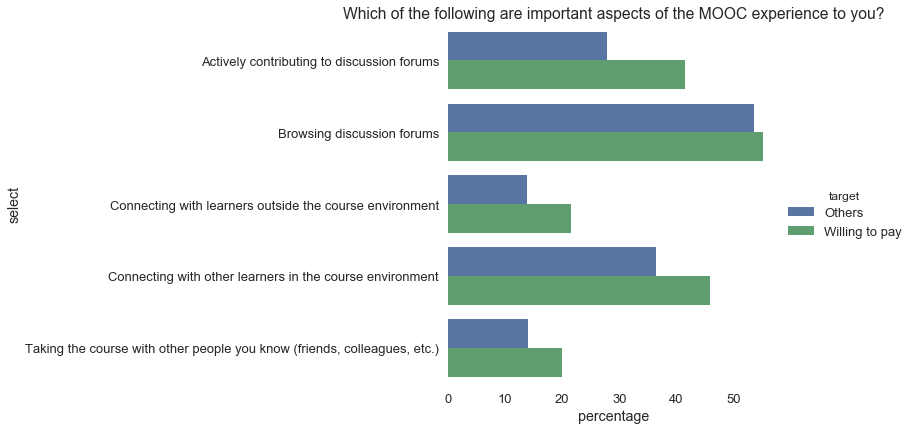

In [12]:
aspects = ['Aspects: Browsing discussion forums', 
           'Aspects: Actively contributing to discussion forums',
           'Aspects: Connecting with other learners in the course environment',
           'Aspects: Connecting with learners outside the course environment',
           'Aspects: Taking the course with other people you know (friends, colleagues, etc.)']
binary_compare_multi_select_categorical_barh(df, target=willing, target_name='Willing to pay',
                question='Which of the following are important aspects of the MOOC experience to you?', 
                selectors=aspects)

Connecting with other students is more important for those who are willing to pay. Is this an opportunity for the platforms to increase their revenue by improving forum features and quality?

{'Willing to pay': 477, 'Others': 2014}
            target                                        select  percentage
0           Others                          Have not taken MOOCs   15.988083
1           Others  Helped me get a new job in a different field    3.574975
2           Others     Helped me get a new job in the same field    4.170804
3           Others  Higher performance evaluation at current job   10.129096
4           Others                                    Not Really   35.849057
5           Others             Promotion at current organization    2.333664
6           Others                School credit towards a degree    2.929494
7   Willing to pay                          Have not taken MOOCs   16.561845
8   Willing to pay  Helped me get a new job in a different field    7.127883
9   Willing to pay     Helped me get a new job in the same field    7.966457
10  Willing to pay  Higher performance evaluation at current job   16.771488
11  Willing to pay                  

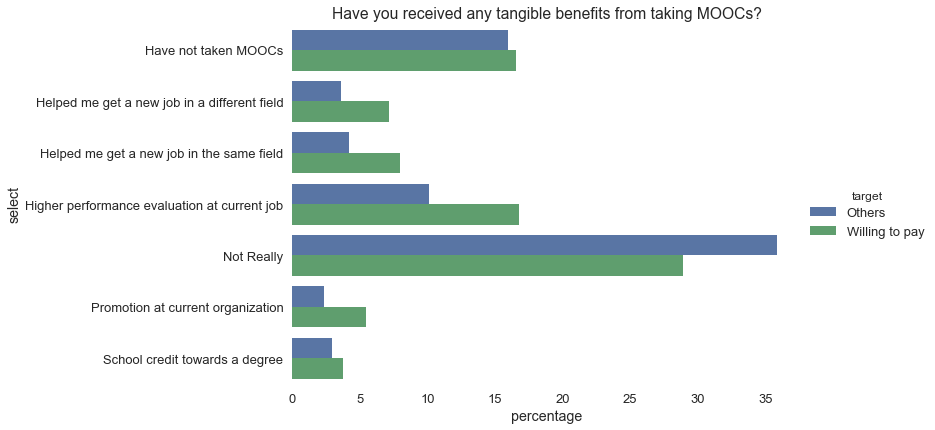

In [13]:
benefits = ['Benefit: Have not taken MOOCs', 
            'Benefit: Not Really',
            'Benefit: School credit towards a degree',
            'Benefit: Promotion at current organization',
            'Benefit: Higher performance evaluation at current job',
            'Benefit: Helped me get a new job in the same field',
            'Benefit: Helped me get a new job in a different field']
binary_compare_multi_select_categorical_barh(df, target=willing, target_name='Willing to pay',
                question='Have you received any tangible benefits from taking MOOCs?', 
                selectors=benefits)

People willing to pay see more benefits in MOOCs

{'Willing to pay': 477, 'Others': 2014}
           target                                             select  \
0          Others  A multi-course certification that the MOOC is ...   
1          Others                       The MOOC platform being used   
2          Others       The institution/university offering the MOOC   
3          Others                           The instructor/professor   
4          Others                                  The topic/subject   
5  Willing to pay  A multi-course certification that the MOOC is ...   
6  Willing to pay                       The MOOC platform being used   
7  Willing to pay       The institution/university offering the MOOC   
8  Willing to pay                           The instructor/professor   
9  Willing to pay                                  The topic/subject   

   percentage  
0   22.095333  
1    8.689176  
2   36.494538  
3   12.859980  
4   43.247269  
5   35.010482  
6   19.077568  
7   53.878407  
8   18.867925  
9   60.

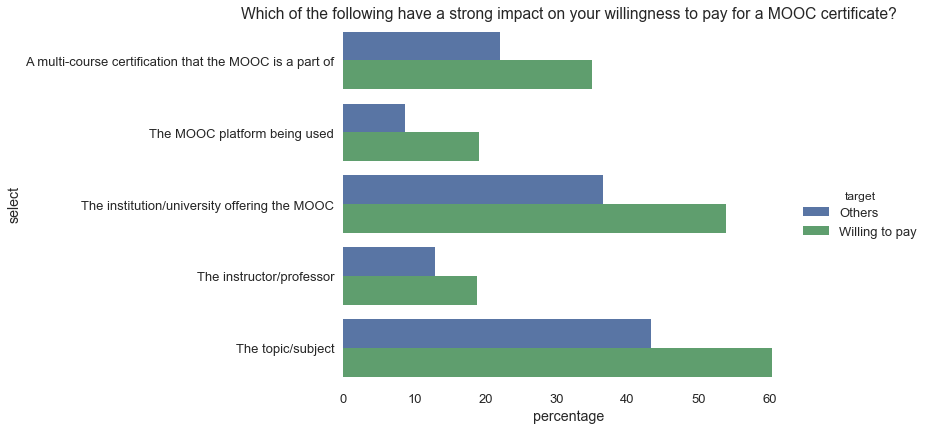

In [14]:
pays = ['Pay: The topic/subject',
        'Pay: The institution/university offering the MOOC',
        'Pay: The instructor/professor', 
        'Pay: The MOOC platform being used',
        'Pay: A multi-course certification that the MOOC is a part of']
binary_compare_multi_select_categorical_barh(df, target=willing, target_name='Willing to pay',
                question='Which of the following have a strong impact on your willingness to pay for a MOOC certificate?', 
                selectors=pays)

   answer         visitor  percentage
0       0           Other   26.613704
1       1           Other    9.582920
2      15           Other    9.533267
3     2.5           Other   15.392254
4      25           Other   11.122145
5     4.5           Other   12.313803
6       8           Other   13.306852
7       0  Willing to pay   27.672956
8       1  Willing to pay   10.062893
9      15  Willing to pay    9.014675
10    2.5  Willing to pay   17.819706
11     25  Willing to pay    7.337526
12    4.5  Willing to pay   13.207547
13      8  Willing to pay   12.997904


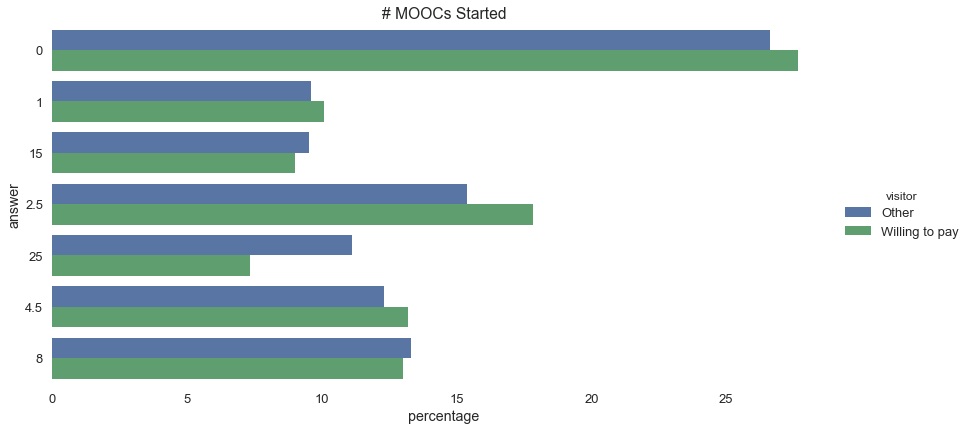

In [15]:
binary_compare_categorical_barh(mask=willing, 
                                        target_name='Willing to pay', feature='# MOOCs Started')

The willingness to pay drops after starting about 7 course

   answer         visitor  percentage
0       0           Other   36.693148
1       1           Other   12.015889
2      15           Other    5.263158
3     2.5           Other   17.576961
4      25           Other    5.958292
5     4.5           Other   10.675273
6       8           Other    8.341609
7       0  Willing to pay   37.106918
8       1  Willing to pay   12.368973
9      15  Willing to pay    5.241090
10    2.5  Willing to pay   16.981132
11     25  Willing to pay    3.983229
12    4.5  Willing to pay   12.578616
13      8  Willing to pay    6.708595


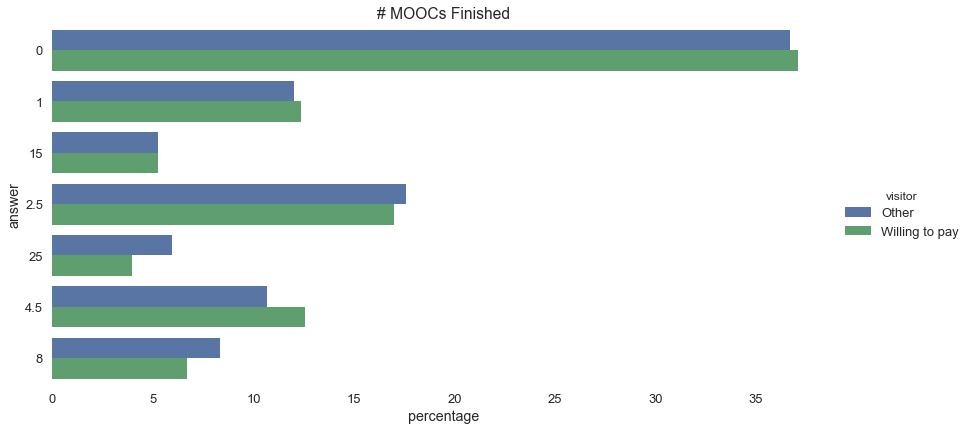

In [16]:
binary_compare_categorical_barh(mask=willing, 
                                        target_name='Willing to pay', feature='# MOOCs Finished')

The more people finish MOOCs the less willingnes to pay. Is this the reason why Coursera is switching to a subscription model?

                           answer         visitor  percentage
0  I have not taken any MOOCs yet           Other   29.841112
1                    2+ years ago           Other   27.805362
2                   1-2 years ago           Other   16.385303
3            Within past 6 months           Other   15.193644
4          6 months to 1 year ago           Other   10.029791
5  I have not taken any MOOCs yet  Willing to pay   30.817610
6                    2+ years ago  Willing to pay   22.012579
7                   1-2 years ago  Willing to pay   17.819706
8            Within past 6 months  Willing to pay   17.400419
9          6 months to 1 year ago  Willing to pay   11.530398


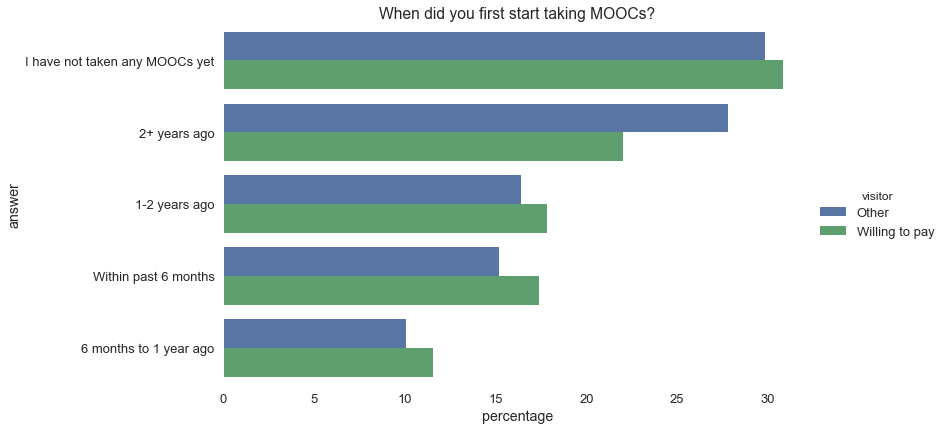

In [17]:
binary_compare_categorical_barh(mask=willing, 
                                        target_name='Willing to pay', feature='When did you first start taking MOOCs?')

People who more recently started taking MOOCs are more willing to pay

   answer         visitor  percentage
0     1.0           Other   11.320755
1     2.0           Other   22.045680
2     3.0           Other   37.735849
3     4.0           Other   14.895730
4     5.0           Other    8.242304
5     1.0  Willing to pay    3.144654
6     2.0  Willing to pay    8.595388
7     3.0  Willing to pay   37.106918
8     4.0  Willing to pay   27.044025
9     5.0  Willing to pay   23.480084


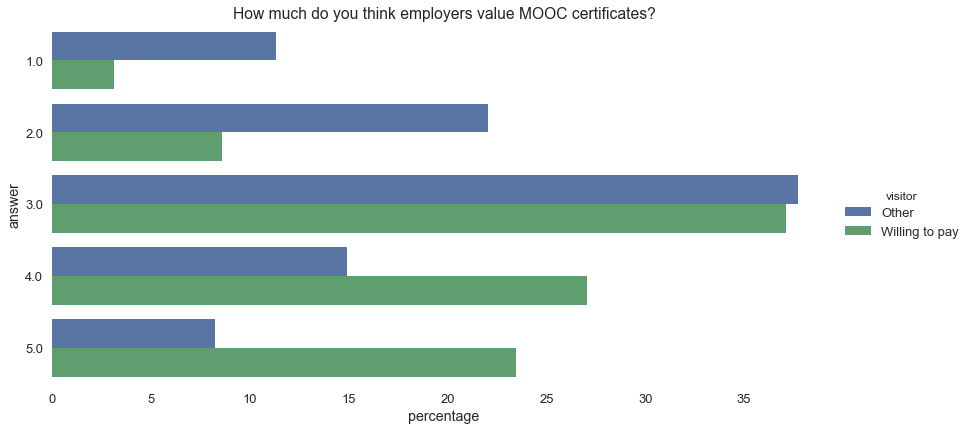

In [18]:
binary_compare_categorical_barh(mask=willing, 
                                        target_name='Willing to pay', 
                                        feature='How much do you think employers value MOOC certificates?')

People who are more willing to pay for a certificate think employer value the certificates about twice as much as people who are less willing to pay for the certificate

                              answer         visitor  percentage
0             Graduate school degree           Other   45.084409
1         3 or 4 year college degree           Other   28.401192
2                 High school degree           Other   13.455809
3              2-year college degree           Other    7.894737
4  Did not graduate from high school           Other    3.624628
5             Graduate school degree  Willing to pay   40.041929
6         3 or 4 year college degree  Willing to pay   30.398323
7                 High school degree  Willing to pay   17.190776
8              2-year college degree  Willing to pay    8.176101
9  Did not graduate from high school  Willing to pay    2.515723


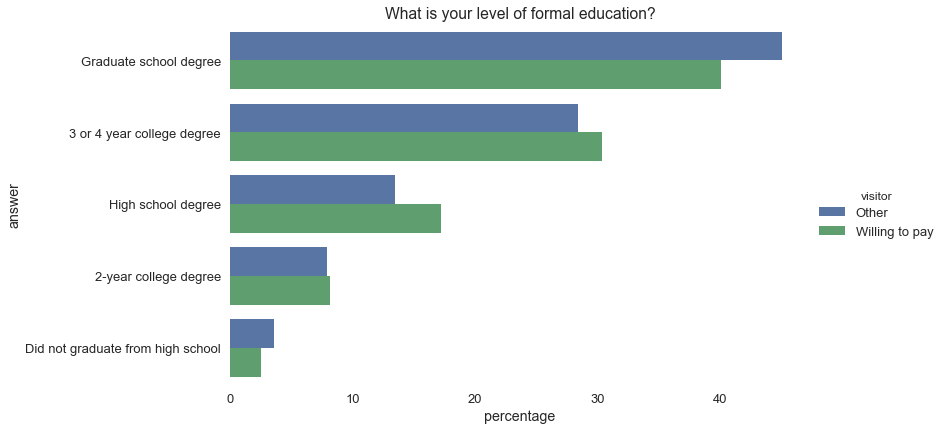

In [19]:
binary_compare_categorical_barh(mask=willing, 
                                        target_name='Willing to pay', 
                                        feature='What is your level of formal education?')

There is very little correlation between willingness to pay for certificates and the education level of the respondent

             answer         visitor  percentage
0   10-17 years old           Other    2.085402
1   18-21 years old           Other    7.199603
2   22-25 years old           Other    8.192651
3   26-29 years old           Other    7.547170
4   30-35 years old           Other   10.029791
5   36-45 years old           Other   15.292949
6   46-55 years old           Other   19.066534
7   56-65 years old           Other   17.080437
8     66+ years old           Other   12.264151
9   10-17 years old  Willing to pay    1.886792
10  18-21 years old  Willing to pay    6.498952
11  22-25 years old  Willing to pay    7.966457
12  26-29 years old  Willing to pay    9.853249
13  30-35 years old  Willing to pay   10.691824
14  36-45 years old  Willing to pay   23.480084
15  46-55 years old  Willing to pay   19.077568
16  56-65 years old  Willing to pay   12.159329
17    66+ years old  Willing to pay    7.966457


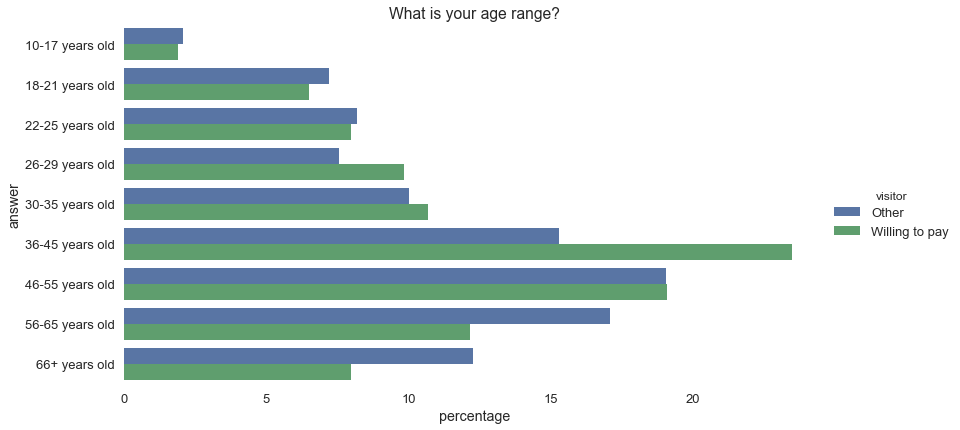

In [20]:
binary_compare_categorical_barh(mask=willing, 
                                        target_name='Willing to pay', 
                                        feature='What is your age range?')

In the age range 36-45 there is significant more willingness to pay, the age range with biggest need to upgrade their skills?
In the age range 56+ the willingness to pay drops.